In [315]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn import metrics
import xgboost as xgb

In [316]:
df = pd.read_csv('data/train.csv')

In [317]:
df['change'].value_counts()

No    38239
Ch    32997
Name: change, dtype: int64

In [318]:
df['race'].unique()

array(['Caucasian', 'AfricanAmerican', 'Hispanic', 'Asian', 'Other', nan],
      dtype=object)

In [319]:
df.isnull().sum()

enc_id                          0
patient_id                      0
race                         1621
gender                          0
age                             0
weight                      68986
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  28178
medical_specialty           34930
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         15
diag_2                        244
diag_3                        989
number_diagnoses                0
max_glu_serum               67515
A1Cresult                   59356
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [320]:
df['diag_1'].value_counts()

428    4836
414    4618
786    2791
410    2537
486    2461
       ... 
352       1
133       1
10        1
833       1
906       1
Name: diag_1, Length: 684, dtype: int64

## Data Visualisation

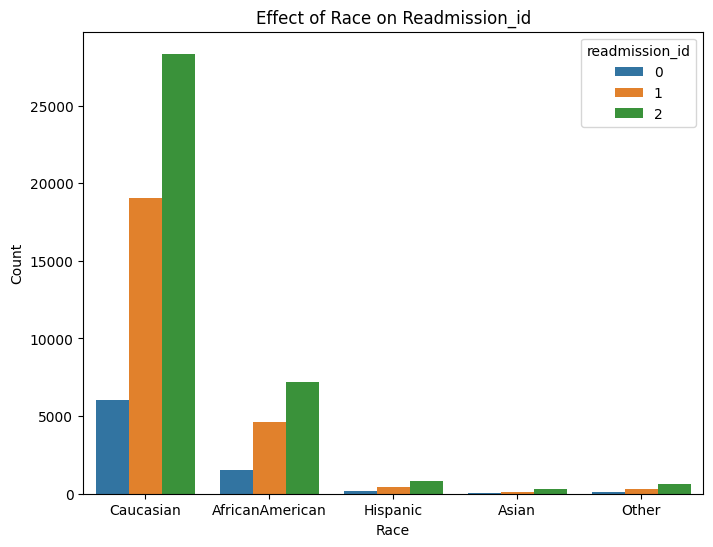

In [321]:
plt.figure(figsize=(8, 6))
sns.countplot(x='race', hue='readmission_id', data=df)
plt.title('Effect of Race on Readmission_id')
plt.xlabel('Race')
plt.ylabel('Count')
plt.show()

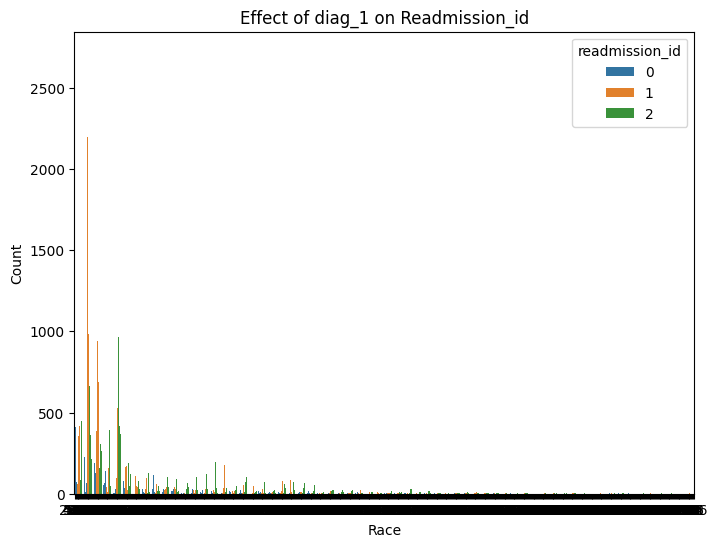

In [322]:
plt.figure(figsize=(8, 6))
sns.countplot(x='diag_1', hue='readmission_id', data=df)
plt.title('Effect of diag_1 on Readmission_id')
plt.xlabel('Race')
plt.ylabel('Count')
plt.show()

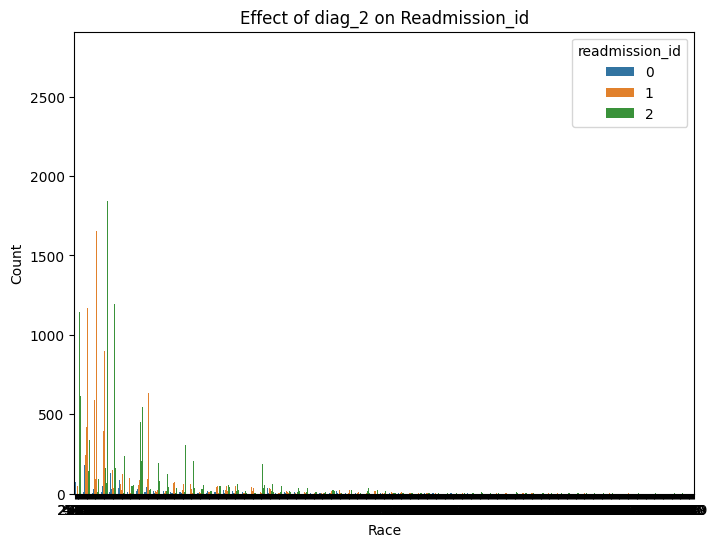

In [323]:
plt.figure(figsize=(8, 6))
sns.countplot(x='diag_2', hue='readmission_id', data=df)
plt.title('Effect of diag_2 on Readmission_id')
plt.xlabel('Race')
plt.ylabel('Count')
plt.show()

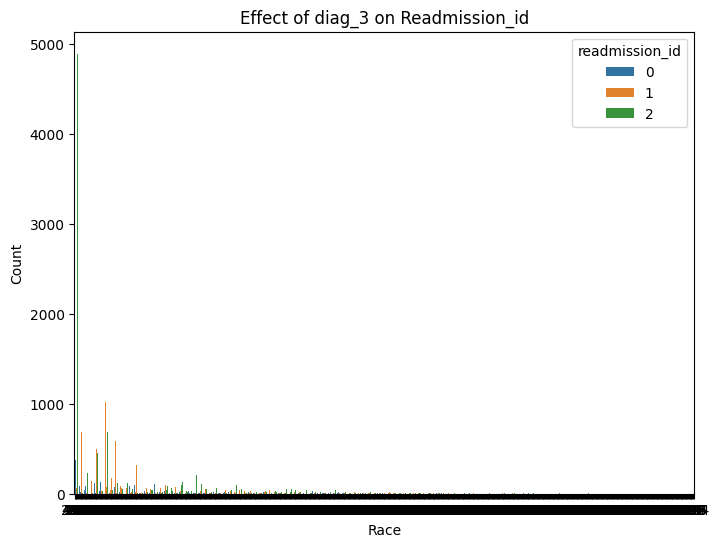

In [324]:
plt.figure(figsize=(8, 6))
sns.countplot(x='diag_3', hue='readmission_id', data=df)
plt.title('Effect of diag_3 on Readmission_id')
plt.xlabel('Race')
plt.ylabel('Count')
plt.show()

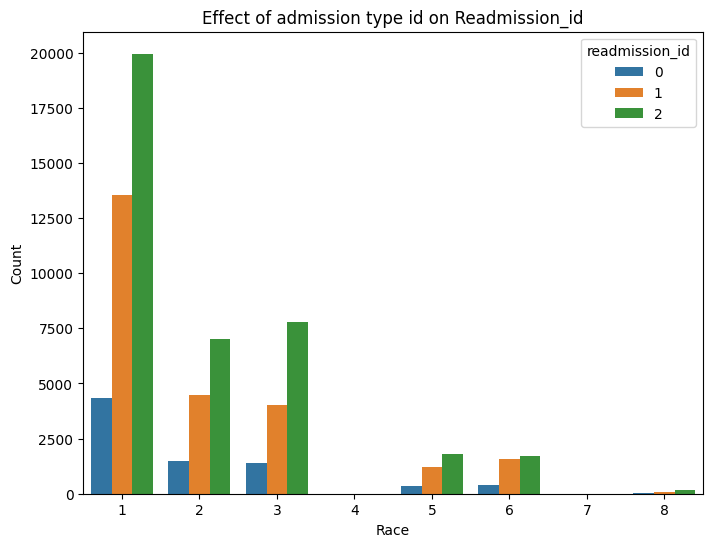

In [325]:
plt.figure(figsize=(8, 6))
sns.countplot(x='admission_type_id', hue='readmission_id', data=df)
plt.title('Effect of admission type id on Readmission_id')
plt.xlabel('Race')
plt.ylabel('Count')
plt.show()

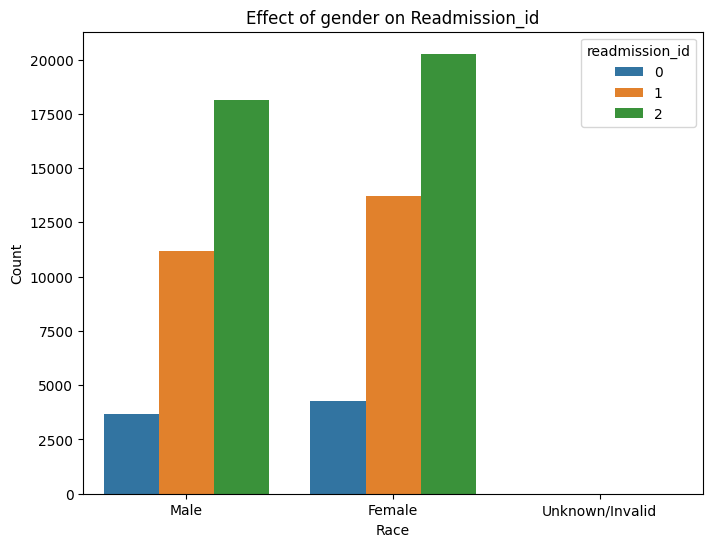

In [326]:
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', hue='readmission_id', data=df)
plt.title('Effect of gender on Readmission_id')
plt.xlabel('Race')
plt.ylabel('Count')
plt.show()

In [327]:
df['age'].value_counts()

[70-80)     18179
[60-70)     15801
[50-60)     12080
[80-90)     12037
[40-50)      6785
[30-40)      2650
[90-100)     1940
[20-30)      1165
[10-20)       495
[0-10)        104
Name: age, dtype: int64

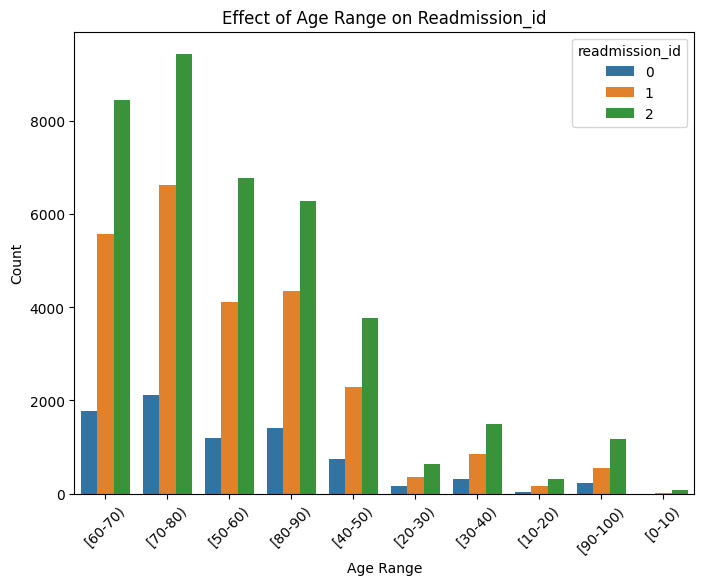

In [328]:
plt.figure(figsize=(8, 6))
sns.countplot(x='age', hue='readmission_id', data=df)
plt.title('Effect of Age Range on Readmission_id')
plt.xlabel('Age Range')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

## Pre-Processing

In [329]:
df['age'].value_counts()

[70-80)     18179
[60-70)     15801
[50-60)     12080
[80-90)     12037
[40-50)      6785
[30-40)      2650
[90-100)     1940
[20-30)      1165
[10-20)       495
[0-10)        104
Name: age, dtype: int64

In [330]:
bins = [0, 40, 70, 100]
labels = [0, 1, 2]
df['Age_Category'] = pd.cut(df['age'].apply(lambda x: int(x.strip('[)').split('-')[0])), bins=bins, labels=labels,include_lowest=True)

print(df['Age_Category'].value_counts())

1    46060
2    13977
0    11199
Name: Age_Category, dtype: int64


#### The columns citoglipton and examide have just 1 value, thus they will not affect the classification

In [331]:
categorical_df=df.drop(['enc_id', 'patient_id','age','weight',
       'time_in_hospital', 'payer_code',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses','diabetesMed','citoglipton','examide','max_glu_serum','A1Cresult'],axis=1)
print(categorical_df.shape)
drugs = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'insulin', 'glyburide-metformin', 'tolazamide', 'metformin-pioglitazone','metformin-rosiglitazone', 'glimepiride-pioglitazone', 'glipizide-metformin', 'troglitazone', 'tolbutamide', 'acetohexamide']
for drug in drugs:
    new_col = drug + 'temp'
    categorical_df[drug] = categorical_df[drug].apply(lambda x: 0 if (x == 'No' or x == 'Steady') else 1)

(71236, 33)


In [332]:
categorical_df.head(20)

,race,gender,admission_type_id,discharge_disposition_id,admission_source_id,medical_specialty,diag_1,diag_2,diag_3,metformin,...,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,readmission_id,Age_Category
0,Caucasian,Male,1,2,6,Family/GeneralPractice,410,428,414,0,...,0,0,0,0,0,0,0,Ch,2,1
1,Caucasian,Male,2,6,1,NaN,414,424,428,0,...,0,0,0,0,0,0,0,No,1,1
2,Caucasian,Female,3,2,1,NaN,518,514,997,0,...,0,1,0,0,0,0,0,Ch,1,1
3,Caucasian,Female,1,1,7,NaN,592,591,250,0,...,0,0,0,0,0,0,0,No,2,1
4,Caucasian,Female,1,6,7,NaN,250.6,713,707,0,...,0,1,0,0,0,0,0,Ch,2,2
5,Caucasian,Female,1,6,7,NaN,599,496,276,0,...,0,0,0,0,0,0,0,Ch,1,1
6,Caucasian,Male,1,5,7,NaN,531,428,584,0,...,0,0,0,0,0,0,0,No,1,2
7,Caucasian,Male,3,18,4,PhysicalMedicineandRehabilitation,V57,707,250.7,0,...,0,0,0,0,0,0,0,No,1,1
8,Caucasian,Male,5,6,7,NaN,518,428,496,0,...,0,0,0,0,0,0,0,No,2,1
9,AfricanAmerican,Male,1,1,7,NaN,850,250.01,805,0,...,0,1,0,0,0,0,0,Ch,2,1


In [333]:
# categorical_df = categorical_df.dropna()

### Feature Engineering for patient details

In [334]:
# categorical_df['gender'] = categorical_df['gender'].map({'Male': 0, 'Female': 1})

In [335]:
features = df[['weight','num_medications','time_in_hospital','num_procedures','num_lab_procedures','number_diagnoses','readmission_id']]
features = features.fillna(0)

In [336]:
filtered_data = features[features['readmission_id'] == 1]
print(filtered_data.head(20))

       weight  num_medications  time_in_hospital  num_procedures  \
1   [100-125)               35                 7               6   
2           0               20                 7               4   
5           0               37                12               3   
6           0               23                11               4   
7           0               18                 8               0   
11          0               15                 2               6   
15          0               15                 1               2   
16          0                7                 1               0   
17          0                5                 1               0   
22          0               10                 2               0   
23          0               19                13               2   
27          0               12                 4               0   
30          0                8                13               0   
34          0               26                 6

In [337]:
features['new_procedure']=features['num_procedures']+features['num_lab_procedures']+features['number_diagnoses']+features['num_medications']+features['time_in_hospital']

In [338]:
features['new_procedure'].shape

(71236,)

In [339]:
filtered_data = features[features['readmission_id'] == 0]
print(filtered_data['new_procedure'].value_counts())

72     147
75     143
76     140
79     139
81     135
      ... 
155      1
169      1
154      1
186      1
167      1
Name: new_procedure, Length: 160, dtype: int64


### Training

In [340]:
X=categorical_df.drop('readmission_id',axis=1)
y=categorical_df['readmission_id']
label_enc = LabelEncoder()
xgb_model = xgb.XGBClassifier(objective="multi:softprob", random_state=42)
for column in X:
    X[column] = label_enc.fit_transform(X[column])
X=pd.concat([X,features['new_procedure']],axis=1)
print(X.shape)

(71236, 33)


In [341]:
# # Reshape the 'new_procedure' column
# new_procedure_reshaped = features['new_procedure'].values.reshape(-1, 1)

# # Initialize the OneHotEncoder
# encoder = OneHotEncoder(sparse_output=False, drop='first')

# # Fit and transform the reshaped 'new_procedure' column
# one_hot_encoded = encoder.fit_transform(new_procedure_reshaped)

# # Create a DataFrame from the one-hot encoded array
# one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(['new_procedure']))

# # Concatenate the one-hot encoded DataFrame with the original DataFrame
# data = pd.concat([categorical_df, one_hot_df], axis=1)
# print(data)


In [342]:
# use grid search to find the best parameters for random forest
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X, y)
print(grid_search.best_params_)

Fitting 3 folds for each of 144 candidates, totalling 432 fits
{'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}


In [357]:
rm = grid_search.best_estimator_
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [358]:
rm.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=200)

In [359]:
y_pred = rm.predict(X_test)
pd.crosstab(pd.Series(y_test, name = 'Actual'), pd.Series(y_pred, name = 'Predict'), margins = True)

Predict,1,2,All
Actual,,,
0,11,322,333
1,38,942,980
2,60,1403,1463
All,109,2667,2776


In [360]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print("Accuracy is {0:.2f}".format(accuracy_score(y_test, y_pred)))
print("micro: {:.2f}".format(metrics.precision_score(y_test, y_pred, average='micro')))
print("macro: {:.2f} ".format( metrics.precision_score(y_test, y_pred, average='macro')))
print("weighted: {:.2f} ".format( metrics.precision_score(y_test, y_pred, average='weighted'))) 
print(classification_report(y_test, y_pred))

Accuracy is 0.54
micro: 0.54
macro: 0.34 
weighted: 0.46 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1593
           1       0.47      0.05      0.09      4998
           2       0.54      0.97      0.70      7657

    accuracy                           0.54     14248
   macro avg       0.34      0.34      0.26     14248
weighted avg       0.46      0.54      0.41     14248



C:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score

### Test data

In [362]:
test=pd.read_csv("data/test.csv")

In [363]:
test.head()

,enc_id,patient_id,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed
0,86305392,23846112,Caucasian,Male,[40-50),NaN,5,5,17,12,...,No,No,Steady,No,No,No,No,No,No,Yes
1,394919696,90620001,Caucasian,Male,[80-90),NaN,2,3,7,3,...,No,No,Down,No,No,No,No,No,Ch,Yes
2,164917446,25342173,AfricanAmerican,Female,[60-70),NaN,3,1,1,8,...,No,No,Down,No,No,No,No,No,Ch,Yes
3,178319040,23481783,AfricanAmerican,Female,[70-80),NaN,1,3,7,10,...,No,No,Up,No,No,No,No,No,Ch,Yes
4,253585416,86500791,Caucasian,Male,[70-80),NaN,1,6,7,5,...,No,No,No,No,No,No,No,No,No,No


In [364]:
bins = [0, 40, 70, 100]
labels = [0, 1, 2]
test['Age_Category'] = pd.cut(test['age'].apply(lambda x: int(x.strip('[)').split('-')[0])), bins=bins, labels=labels,include_lowest=True)

print(test['Age_Category'].value_counts())

1    19747
2     6013
0     4770
Name: Age_Category, dtype: int64


In [365]:
test_df=test.drop(['enc_id', 'patient_id','age', 'weight',
       'time_in_hospital', 'payer_code',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses','citoglipton','examide', 'diabetesMed','max_glu_serum','A1Cresult'],axis=1)
print(test_df.shape)

(30530, 32)


In [366]:
test['new_procedure']=test['num_procedures']+test['num_lab_procedures']+test['number_diagnoses']+test['num_medications']+test['time_in_hospital']

In [367]:
test_df=pd.concat([test_df,test['new_procedure']],axis=1)
print(test_df.shape)

(30530, 33)


In [353]:
# # Reshape the 'new_procedure' column
# new_procedure_reshaped = test['new_procedure'].values.reshape(-1, 1)

# # Initialize the OneHotEncoder
# encoder = OneHotEncoder(sparse_output=False, drop='first')

# # Fit and transform the reshaped 'new_procedure' column
# one_hot_encoded = encoder.fit_transform(new_procedure_reshaped)

# # Create a DataFrame from the one-hot encoded array
# one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(['new_procedure']))

# # Concatenate the one-hot encoded DataFrame with the original DataFrame
# test_df = pd.concat([test_df, one_hot_df], axis=1)
# print(test_df.shape)


In [368]:
label_encoder = LabelEncoder()
for column in test_df:
    test_df[column] = label_encoder.fit_transform(test_df[column])

In [369]:
test_pred = rm.predict(test_df)

In [370]:
test_df['readmission_id']=test_pred
test_df['enc_id']=test['enc_id']
cvfile = pd.concat((test_df["enc_id"], test_df["readmission_id"]), axis=1)
cvfile.head()
cvfile.to_csv('finale.csv', index=False)